In [1]:
# import statements
import pandas as pd
from pandas import DataFrame
from numpy import NaN
import csv
from matplotlib import pyplot as plt
import os

In [43]:
# read the assay files and load the data into a data frame
def load_df(filename):
    f = open(filename)
    data_raw = f.read()
    f.close()

    data1 = data_raw.split('\n')
    data2 = data1[1:]
    header = data1[0]
    indices = header.split('\t')
    data3 = [i.split('\t') for i in data2]
    data = DataFrame(data3, columns = indices)
    data = data.replace('', NaN)
    data = data.replace('None', NaN)
    data = data.dropna()
    df = data.iloc[:100] # trim to consider about 24 hrs
    for col in df: # type conversions for all columns
        if col == 'Time' or col == 'T 500':
            continue
        df[col] = df[col].astype(float)
    return df    

In [44]:
# works for 384 (16x24) welled plate
def graph_df(df):
    fig, ax = plt.subplots(nrows = 16, ncols = 24, sharex = True, sharey = True, figsize = (20, 20))
    for col in df.columns[2:]: # exclude the non-well columns
        index = list(df.columns[2:]).index(col)
        ax[index//24][index%24].plot(df['Time'], df[col])
        ax[index//24][index%24].get_xaxis().set_visible(False)
        ax[index//24][index%24].get_yaxis().set_visible(False)

In [45]:
# inspect 4 wells
def inspect_well(df, w1, w2, w3, w4):
    fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True, figsize = (4,4))
    ax[0,0].plot(df['Time'], df[w1])
    ax[0,0].get_xaxis().set_visible(False)
    ax[0,0].get_yaxis().set_visible(False)
    ax[0,1].plot(df['Time'], df[w2])
    ax[0,1].get_xaxis().set_visible(False)
    ax[0,1].get_yaxis().set_visible(False)
    ax[1,0].plot(df['Time'], df[w3])
    ax[1,0].get_xaxis().set_visible(False)
    ax[1,0].get_yaxis().set_visible(False)
    ax[1,1].plot(df['Time'], df[w4])
    ax[1,1].get_xaxis().set_visible(False)
    ax[1,1].get_yaxis().set_visible(False)

In [49]:
files = [item for item in os.listdir() if item.endswith('.txt')]
files

['Rutuja 04 06.txt',
 'Rutuja 04 08.txt',
 'Rutuja 04 09.txt',
 'Rutuja 04 10.txt',
 'Rutuja 04 28.txt',
 'Rutuja 04 30.txt',
 'Rutuja 05 03.txt',
 'Rutuja 05 05.txt']

In [50]:
df6 = load_df(files[0])
df8 = load_df(files[1])
df9 = load_df(files[2])
df10 = load_df(files[3])

C:\Users\rmgup\AppData\Local\Temp\ipykernel_32796\3480844917.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
C:\Users\rmgup\AppData\Local\Temp\ipykernel_32796\3480844917.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
C:\Users\rmgup\AppData\Local\Temp\ipykernel_32796\3480844917.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

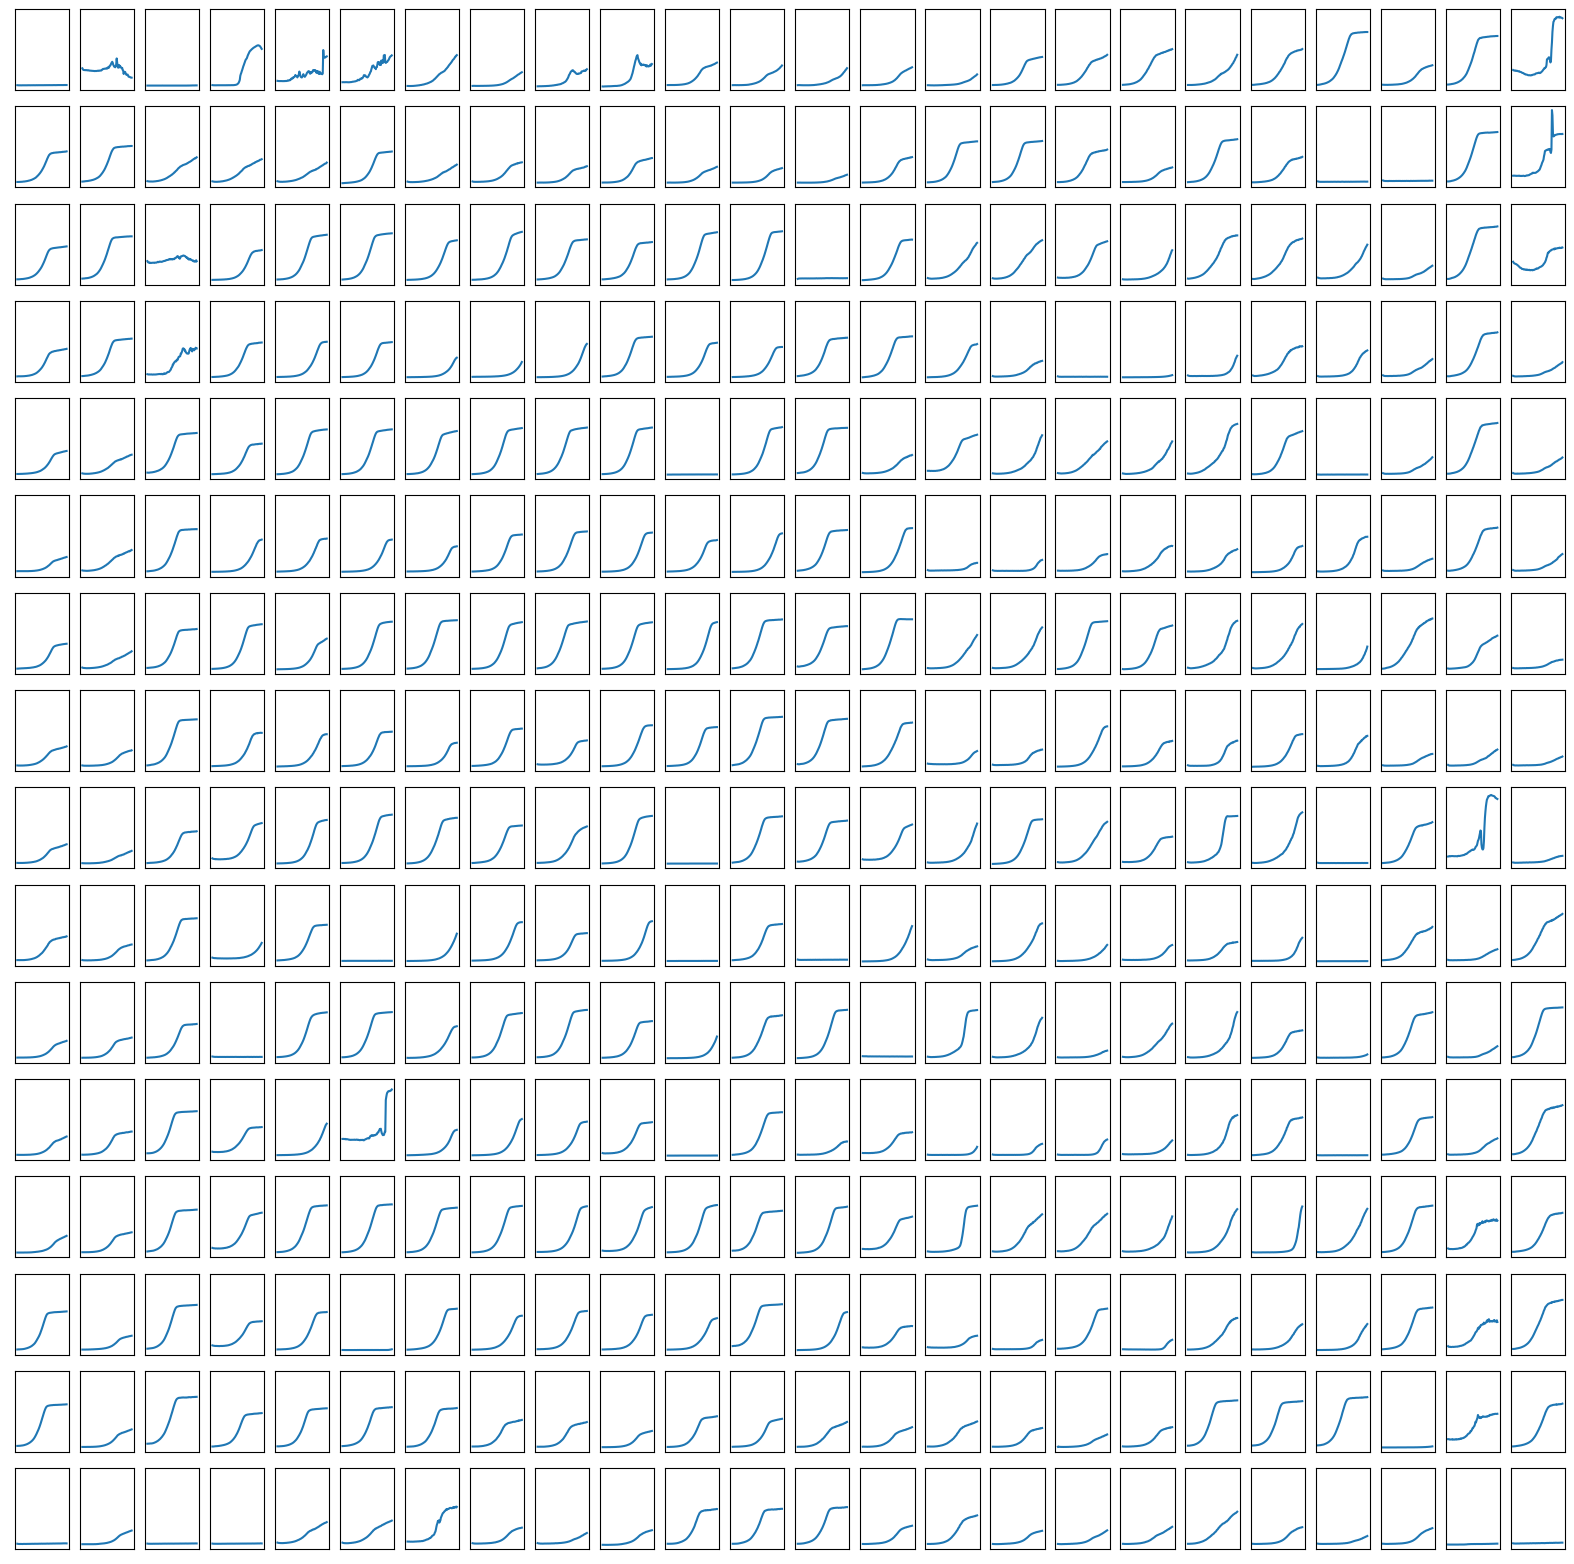

In [51]:
graph_df(df6)

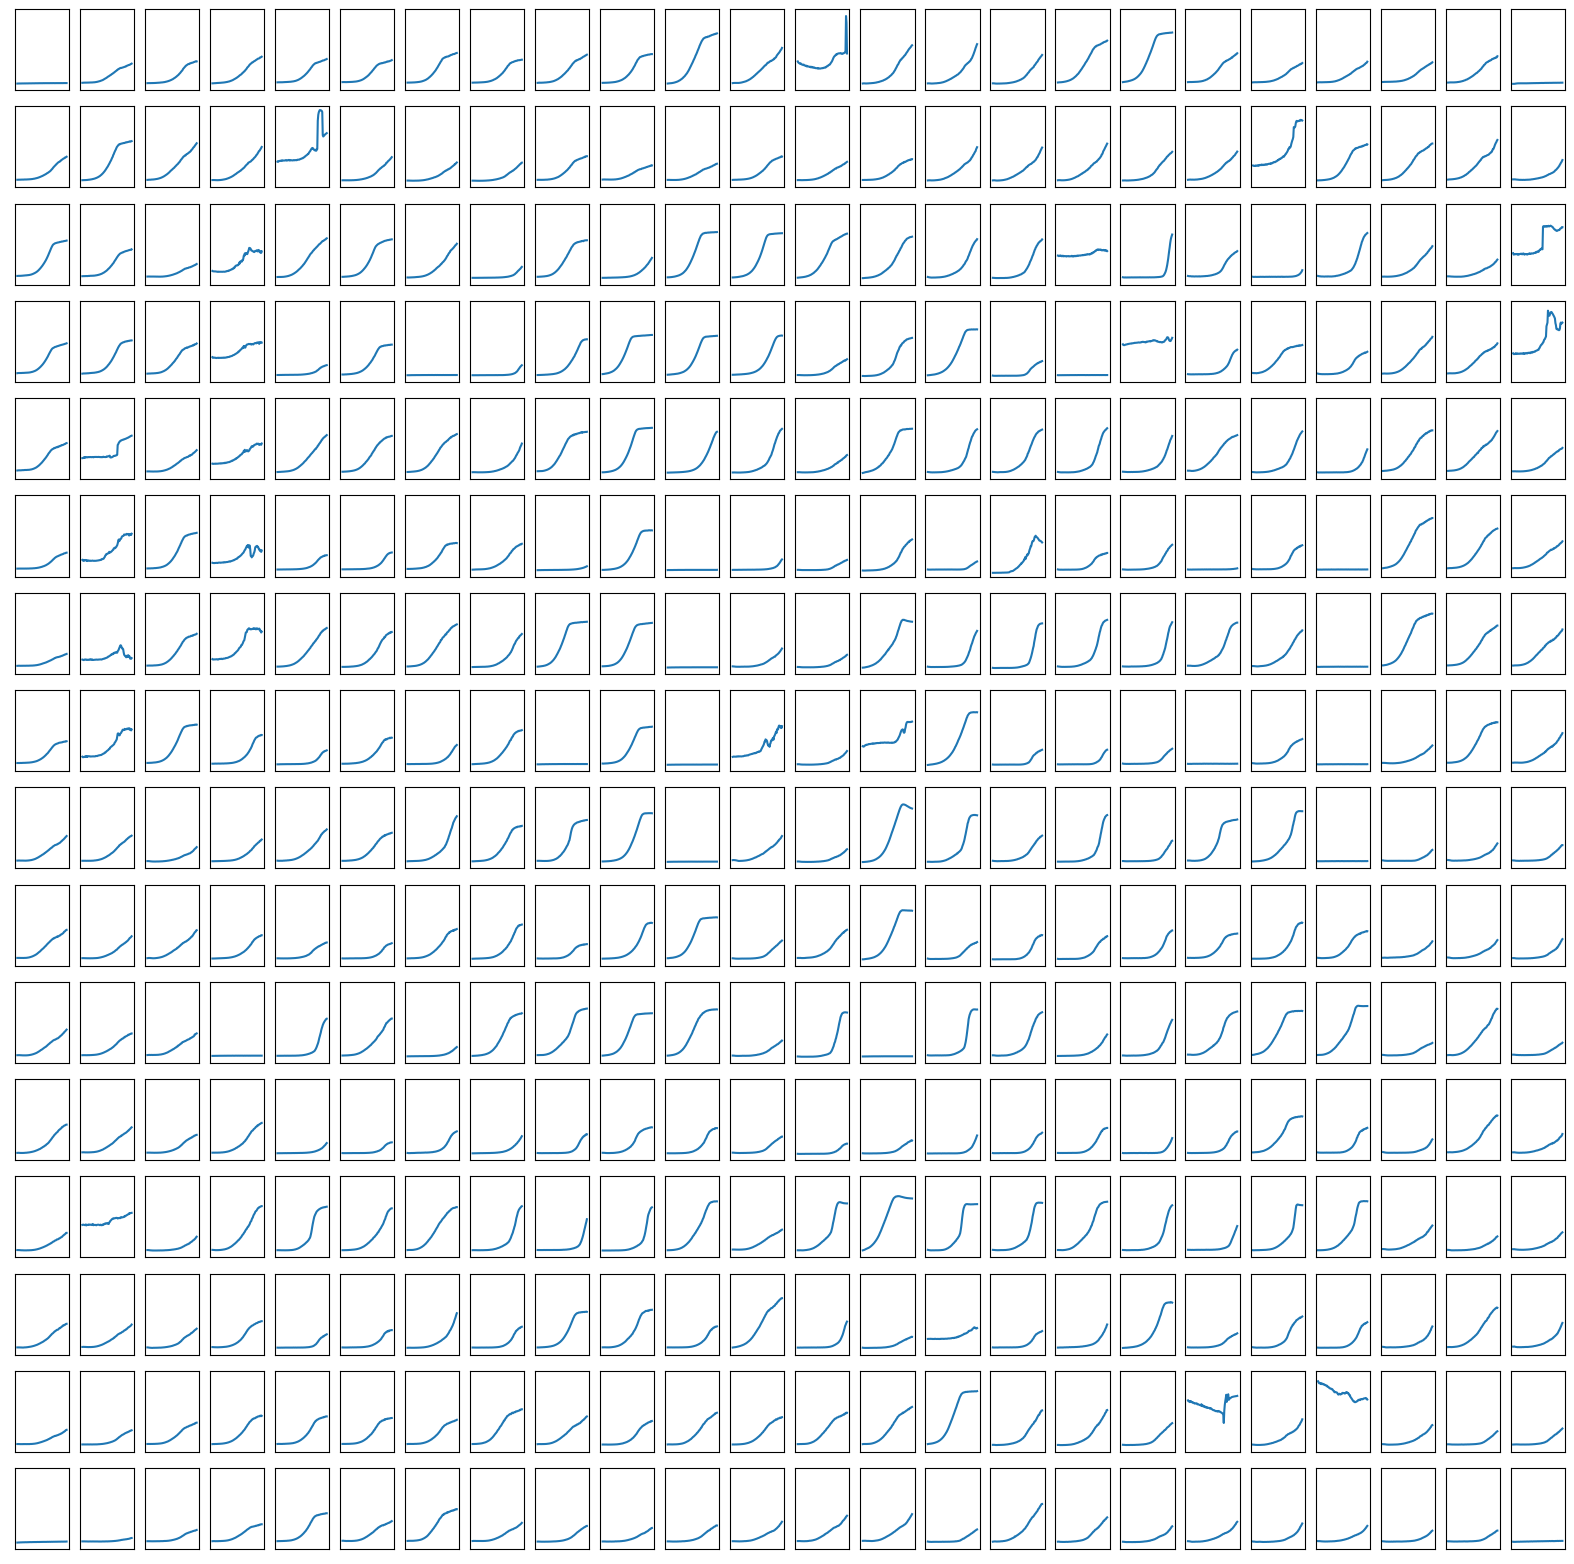

In [52]:
graph_df(df8)

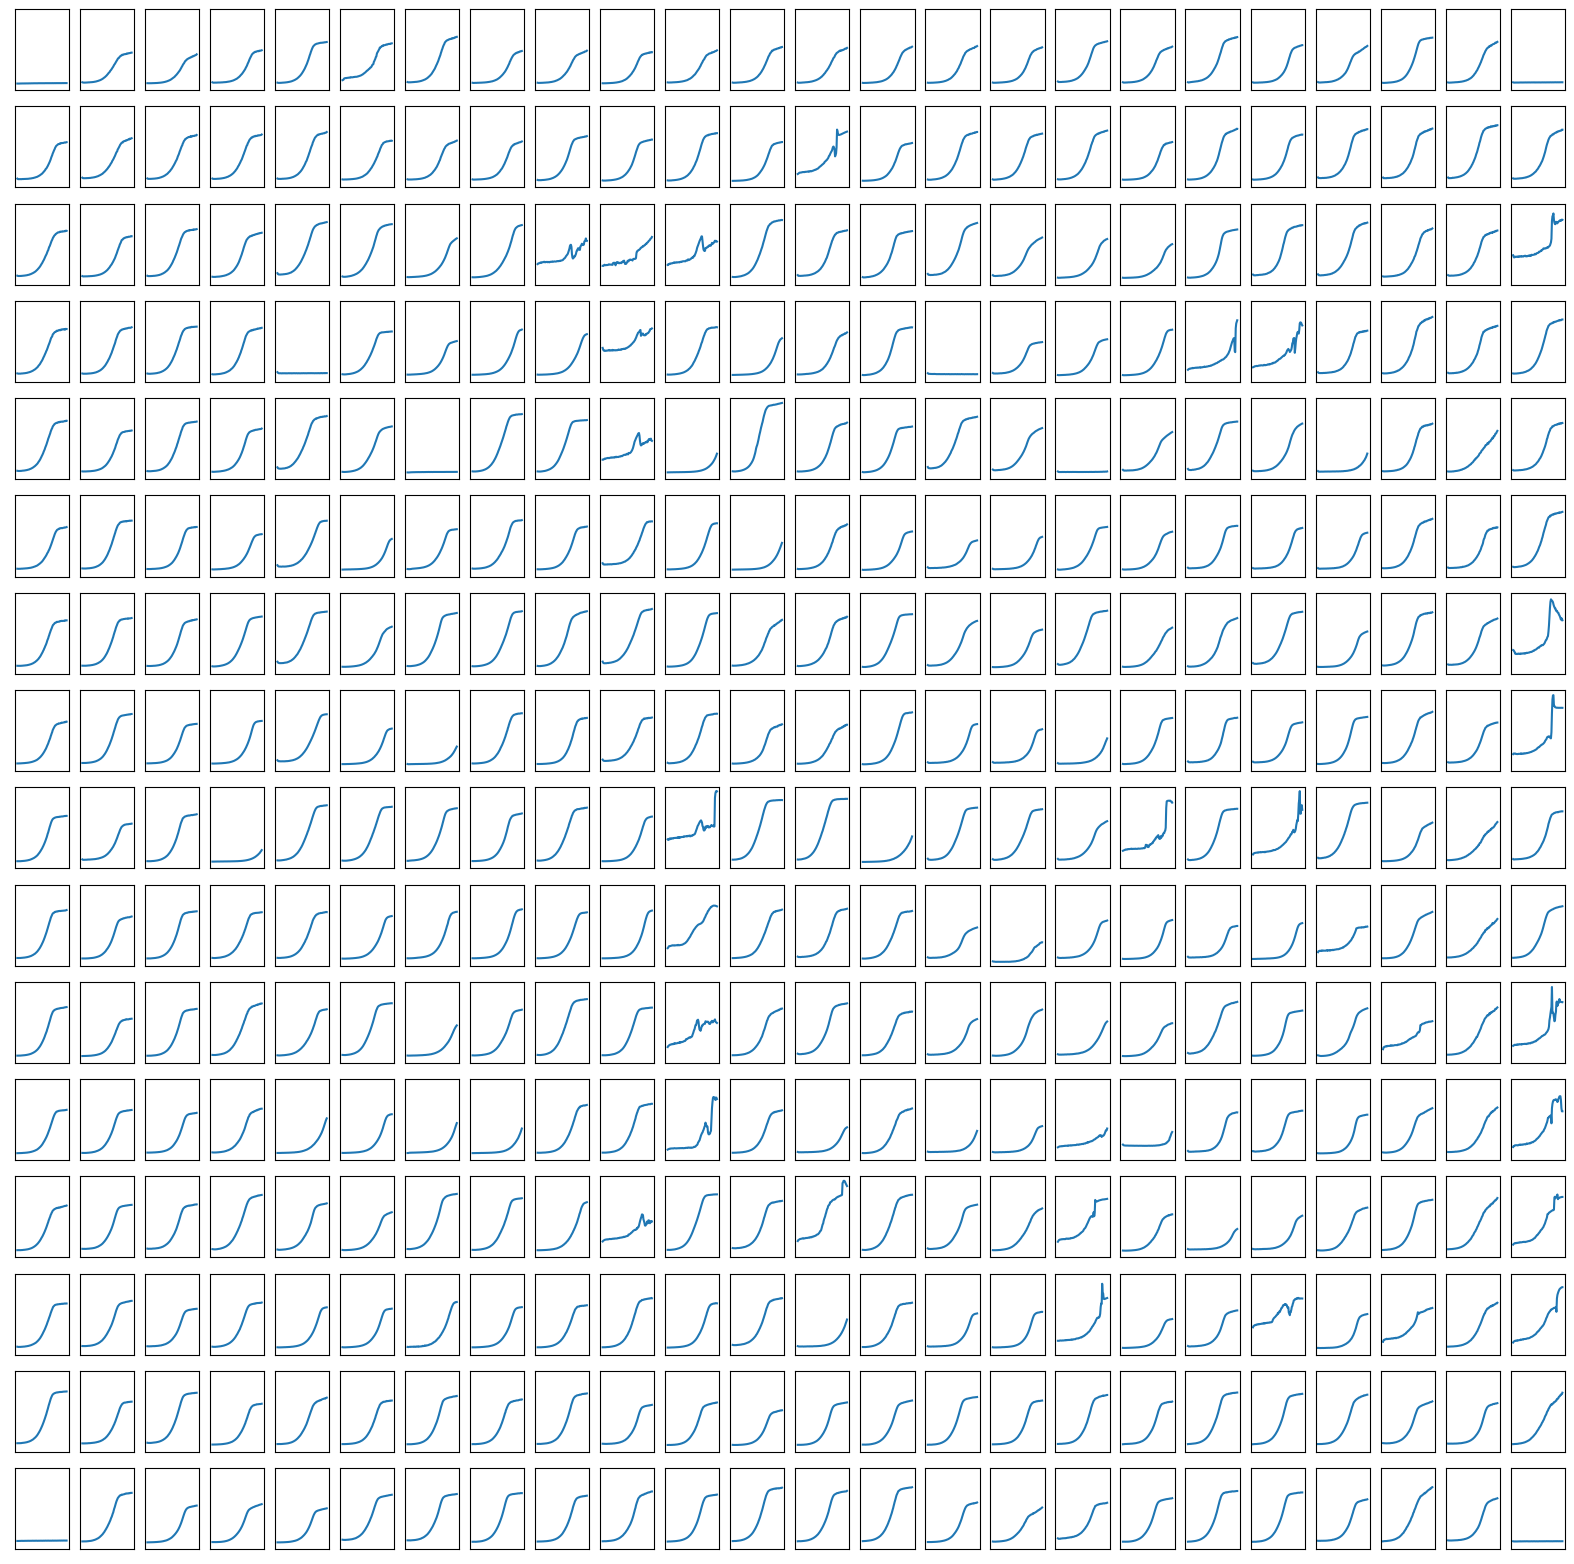

In [53]:
graph_df(df9)

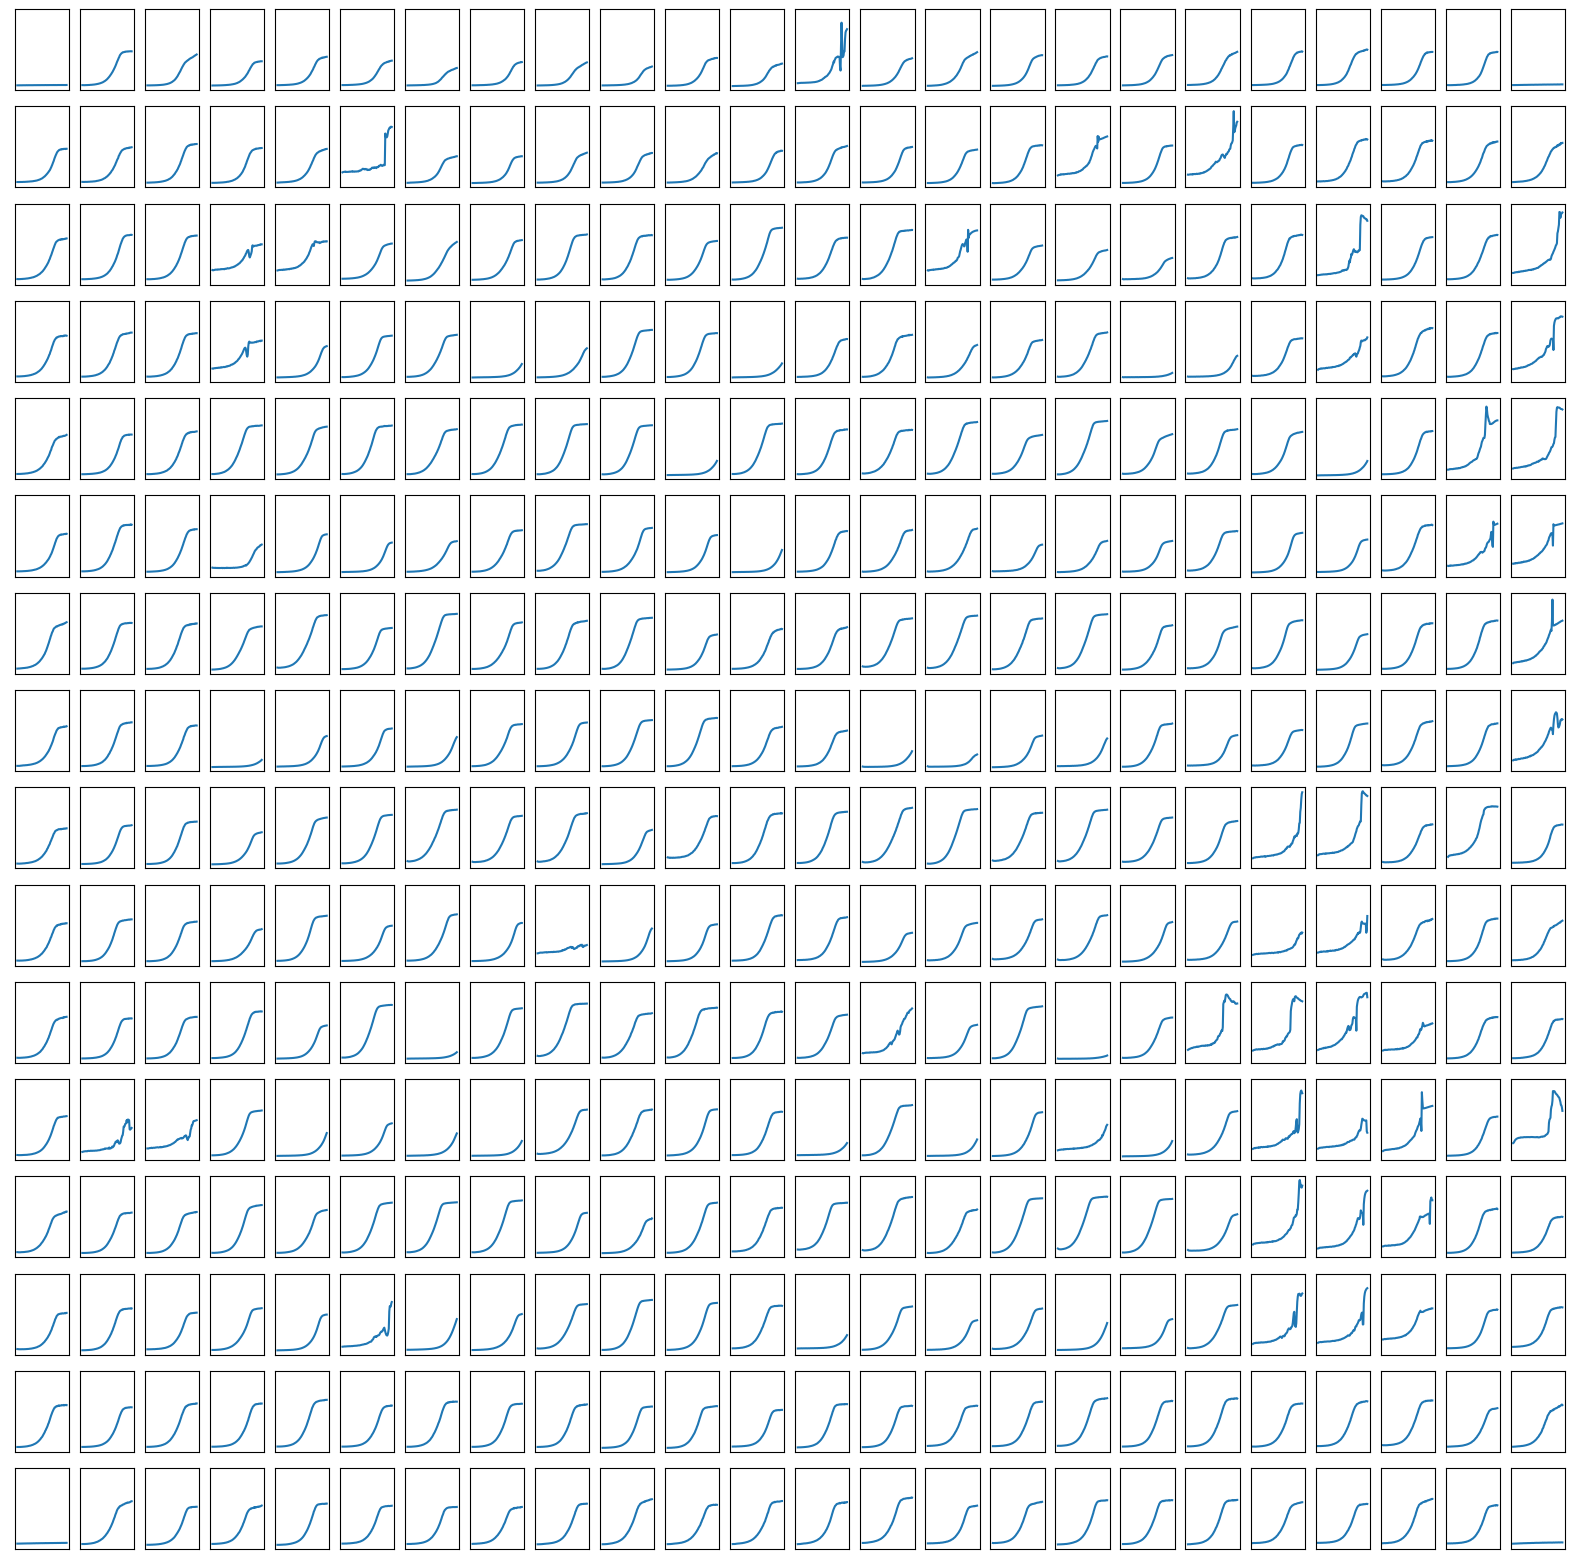

In [54]:
graph_df(df10)

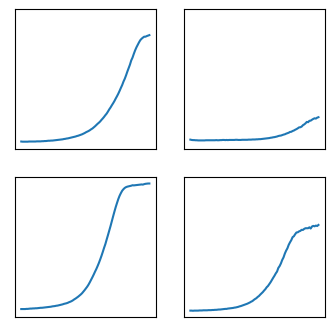

In [55]:
inspect_well(df6, 'K7', 'K17', 'H8', 'H18') #45, 45, 54, 54

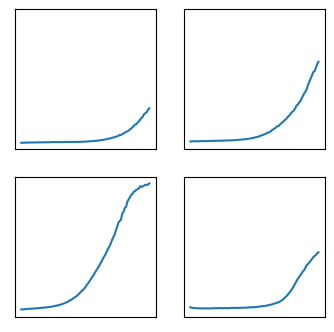

In [56]:
inspect_well(df8, 'K7', 'K17', 'H8', 'H18') #45, 45, 54, 54

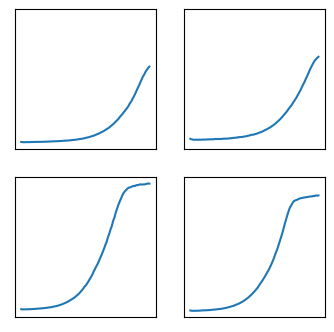

In [57]:
inspect_well(df9, 'K7', 'K17', 'H8', 'H18') #45, 45, 54, 54

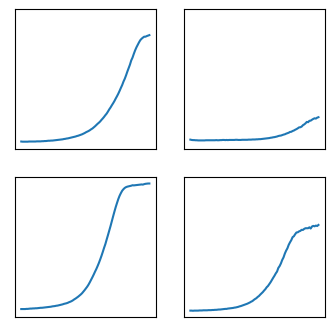

In [58]:
inspect_well(df6, 'K7', 'K17', 'H8', 'H18') #45, 45, 54, 54